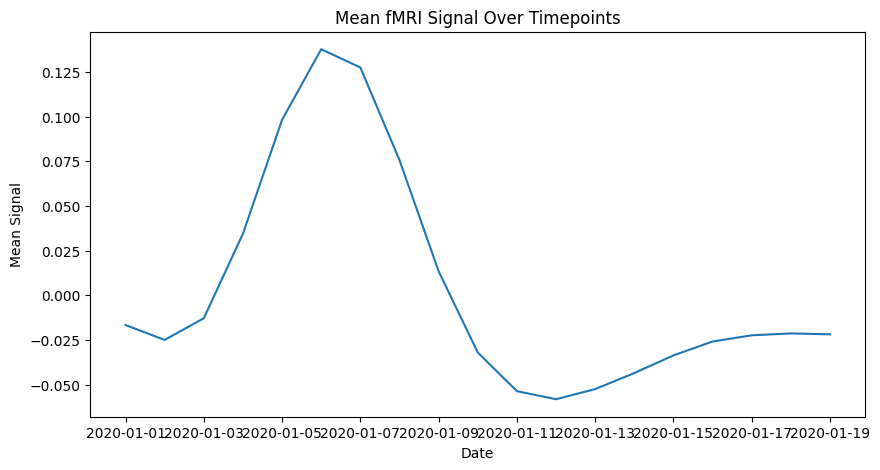

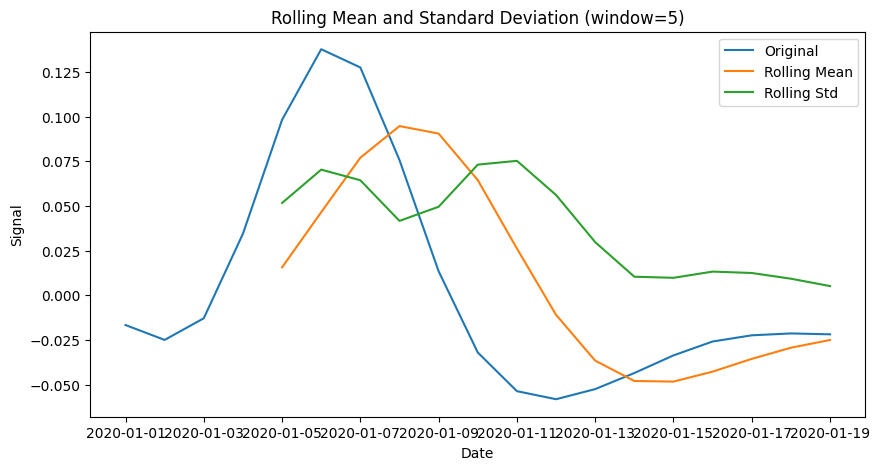

ADF Test after First Differencing:
Test Statistic                 -0.197552
p-value                         0.938813
#lags used                      6.000000
number of observations used    11.000000
dtype: float64
Critical Value 1%: -4.223238279489106
Critical Value 5%: -3.189368925619835
Critical Value 10%: -2.729839421487603


C:\Users\riyar\AppData\Local\Temp\ipykernel_37348\3435439497.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window=5).mean()
C:\Users\riyar\AppData\Local\Temp\ipykernel_37348\3435439497.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window=5).std()


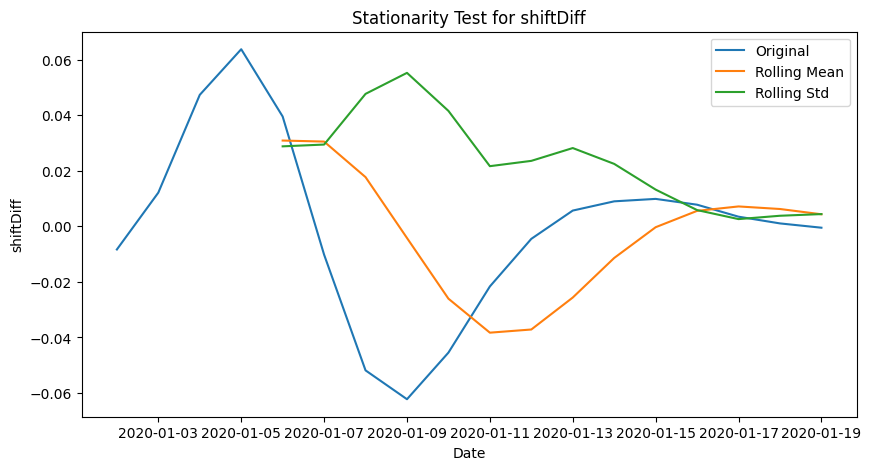

ADF Test on Log Transformed Series:
Test Statistic                 -3.620108
p-value                         0.005388
#lags used                      4.000000
number of observations used    14.000000
dtype: float64
Critical Value 1%: -4.01203360058309
Critical Value 5%: -3.1041838775510207
Critical Value 10%: -2.6909873469387753


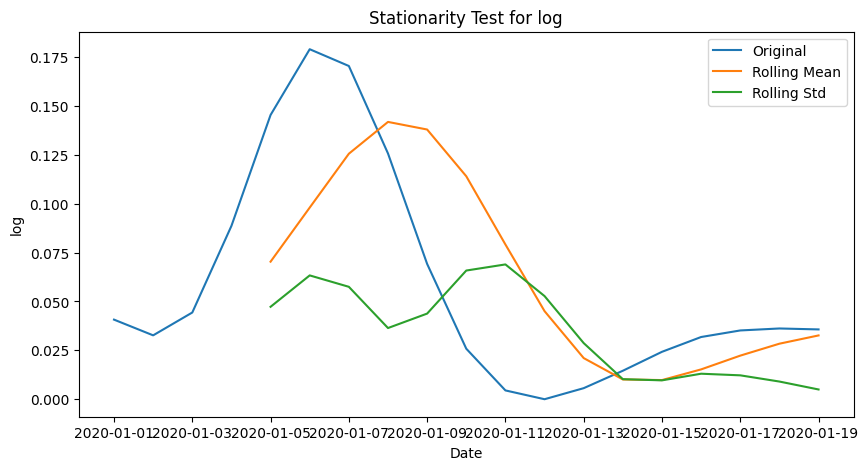

ADF Test after Log Differencing:
Test Statistic                -5.889608e+00
p-value                        2.945628e-07
#lags used                     1.000000e+00
number of observations used    1.600000e+01
dtype: float64
Critical Value 1%: -3.9240193847656246
Critical Value 5%: -3.0684982031250003
Critical Value 10%: -2.67389265625


C:\Users\riyar\AppData\Local\Temp\ipykernel_37348\3435439497.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window=5).mean()
C:\Users\riyar\AppData\Local\Temp\ipykernel_37348\3435439497.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window=5).std()


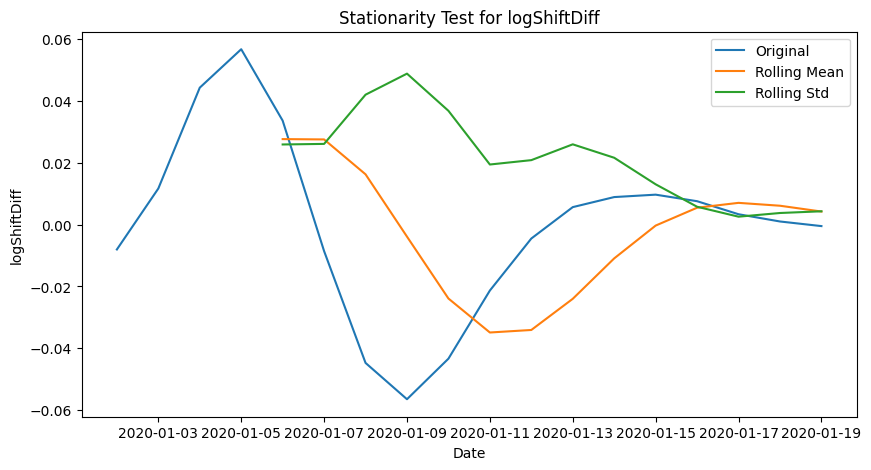

C:\Users\riyar\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\riyar\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\riyar\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\riyar\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\riyar\AppData\Local\Pr

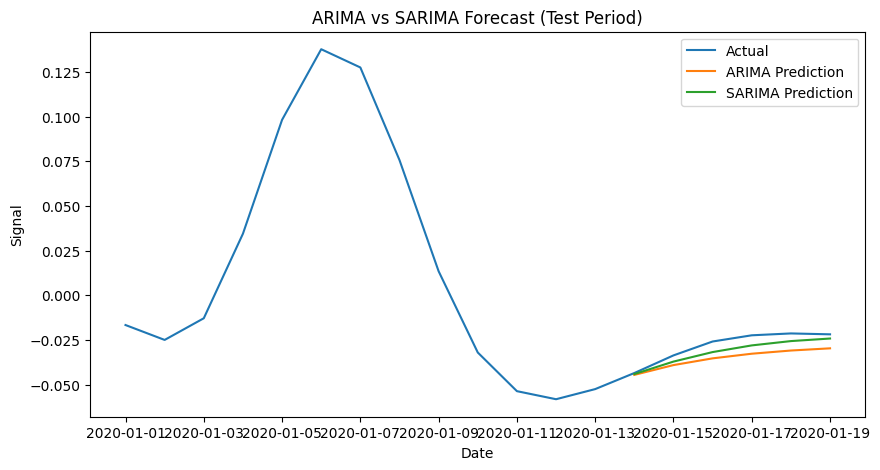

ARIMA RMSE: 0.0079
SARIMA RMSE: 0.0041


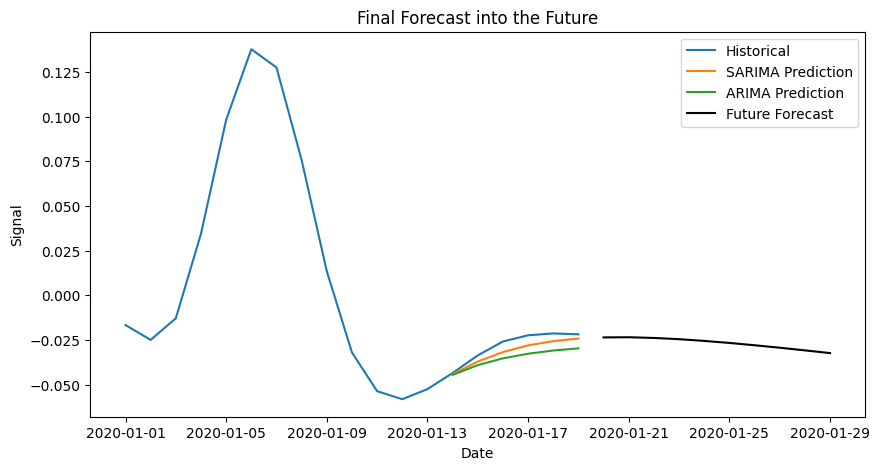

In [6]:
# In[1]: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# In[2]: Load and Prepare Data
fmri = sns.load_dataset('fmri')
# Aggregate mean signal per timepoint
fmri_agg = fmri.groupby('timepoint')['signal'].mean().reset_index()
# Create a datetime index (simulate with days from a start date)
fmri_agg['date'] = pd.to_datetime('2020-01-01') + pd.to_timedelta(fmri_agg['timepoint'], unit='D')
fmri_agg.set_index('date', inplace=True)
fmri_agg.head()

# In[3]: Visualize the Time Series
plt.figure(figsize=(10,5))
sns.lineplot(data=fmri_agg, x=fmri_agg.index, y='signal')
plt.title('Mean fMRI Signal Over Timepoints')
plt.xlabel('Date')
plt.ylabel('Mean Signal')
plt.show()

# In[4]: Rolling Mean and Standard Deviation
fmri_agg['rollMean'] = fmri_agg['signal'].rolling(window=5).mean()
fmri_agg['rollStd'] = fmri_agg['signal'].rolling(window=5).std()

plt.figure(figsize=(10,5))
sns.lineplot(data=fmri_agg, x=fmri_agg.index, y='signal', label='Original')
sns.lineplot(data=fmri_agg, x=fmri_agg.index, y='rollMean', label='Rolling Mean')
sns.lineplot(data=fmri_agg, x=fmri_agg.index, y='rollStd', label='Rolling Std')
plt.legend()
plt.title('Rolling Mean and Standard Deviation (window=5)')
plt.xlabel('Date')
plt.ylabel('Signal')
plt.show()

# In[5]: Stationarity Test Function
from statsmodels.tsa.stattools import adfuller

def test_stationarity(dataFrame, var):
    dataFrame['rollMean'] = dataFrame[var].rolling(window=5).mean()
    dataFrame['rollStd'] = dataFrame[var].rolling(window=5).std()
    adfTest = adfuller(dataFrame[var].dropna(), autolag='AIC')
    stats = pd.Series(adfTest[0:4], index=['Test Statistic', 'p-value', '#lags used', 'number of observations used'])
    print(stats)
    for key, value in adfTest[4].items():
        print(f'Critical Value {key}: {value}')
    plt.figure(figsize=(10,5))
    sns.lineplot(data=dataFrame, x=dataFrame.index, y=var, label='Original')
    sns.lineplot(data=dataFrame, x=dataFrame.index, y='rollMean', label='Rolling Mean')
    sns.lineplot(data=dataFrame, x=dataFrame.index, y='rollStd', label='Rolling Std')
    plt.legend()
    plt.title(f'Stationarity Test for {var}')
    plt.xlabel('Date')
    plt.ylabel(var)
    plt.show()

# In[6]: First Differencing
diff_df = fmri_agg[['signal']].copy()
diff_df['shift'] = diff_df['signal'].shift()
diff_df['shiftDiff'] = diff_df['signal'] - diff_df['shift']
print("ADF Test after First Differencing:")
test_stationarity(diff_df.dropna(), 'shiftDiff')

# In[7]: Log Transformation
log_df = fmri_agg[['signal']].copy()
min_signal = log_df['signal'].min()
if min_signal <= 0:
    log_df['log'] = np.log(log_df['signal'] - min_signal + 1)
else:
    log_df['log'] = np.log(log_df['signal'])
print("ADF Test on Log Transformed Series:")
test_stationarity(log_df, 'log')

# In[8]: Log Differencing
log_shift = log_df[['log']].copy()
log_shift['logShift'] = log_shift['log'].shift()
log_shift['logShiftDiff'] = log_shift['log'] - log_shift['logShift']
print("ADF Test after Log Differencing:")
test_stationarity(log_shift.dropna(), 'logShiftDiff')

# In[9]: Model Building (ARIMA/SARIMA)
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Split train/test
train = fmri_agg.iloc[:int(len(fmri_agg)*0.7)]
test = fmri_agg.iloc[int(len(fmri_agg)*0.7):]

# ARIMA model (p=1, d=1, q=1)
model_arima = ARIMA(train['signal'], order=(1, 1, 1))
model_arima_fit = model_arima.fit()
prediction_arima = model_arima_fit.predict(start=test.index[0], end=test.index[-1])
fmri_agg['arima_pred'] = np.nan
fmri_agg.loc[test.index, 'arima_pred'] = prediction_arima

# SARIMA model (p=1, d=1, q=1, seasonal_order=(1,1,1,2))
model_sarima = SARIMAX(train['signal'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 2))
model_sarima_fit = model_sarima.fit(disp=False)
prediction_sarima = model_sarima_fit.predict(start=test.index[0], end=test.index[-1])
fmri_agg['sarima_pred'] = np.nan
fmri_agg.loc[test.index, 'sarima_pred'] = prediction_sarima

# In[10]: Plot Model Predictions
plt.figure(figsize=(10,5))
sns.lineplot(data=fmri_agg, x=fmri_agg.index, y='signal', label='Actual')
sns.lineplot(data=fmri_agg, x=fmri_agg.index, y='arima_pred', label='ARIMA Prediction')
sns.lineplot(data=fmri_agg, x=fmri_agg.index, y='sarima_pred', label='SARIMA Prediction')
plt.legend()
plt.title('ARIMA vs SARIMA Forecast (Test Period)')
plt.xlabel('Date')
plt.ylabel('Signal')
plt.show()

# In[11]: Calculate RMSE
rmse_arima = np.sqrt(np.mean((test['signal'] - prediction_arima)**2))
rmse_sarima = np.sqrt(np.mean((test['signal'] - prediction_sarima)**2))
print(f"ARIMA RMSE: {rmse_arima:.4f}")
print(f"SARIMA RMSE: {rmse_sarima:.4f}")

# In[12]: Forecast into the Future
future_dates = pd.date_range(start=fmri_agg.index[-1] + pd.Timedelta(days=1), periods=10, freq='D')
future_pred = model_sarima_fit.predict(start=future_dates[0], end=future_dates[-1])

plt.figure(figsize=(10,5))
sns.lineplot(data=fmri_agg, x=fmri_agg.index, y='signal', label='Historical')
sns.lineplot(data=fmri_agg, x=fmri_agg.index, y='sarima_pred', label='SARIMA Prediction')
sns.lineplot(data=fmri_agg, x=fmri_agg.index, y='arima_pred', label='ARIMA Prediction')
plt.plot(future_dates, future_pred, color='black', label='Future Forecast')
plt.legend()
plt.title('Final Forecast into the Future')
plt.xlabel('Date')
plt.ylabel('Signal')
plt.show()